# Downmixing

In this notebook we explore the power loss associated with downmixing.

For this exercise we set the following parameters:


Local oscillator frequency = 18749286322.187534 Hz
<br>
test_frequency = 18,907,952,975.819836 Hz

First of all, we set a sampling frequency, fs=18.91e10 Hz, and a time array. We then generate a signal at the test frequency and another signal at the local oscillator frequency. We then multiply the two signals to obtain the downmixed signal. We apply a low-pass filter to the downmixed signal to remove the high frequency components.


We then plot
- The original signal
- The mixed signal
- The downmixed signal
- And the associated FFT Spectra

This is done for both noise and signal.

158666653.63230133


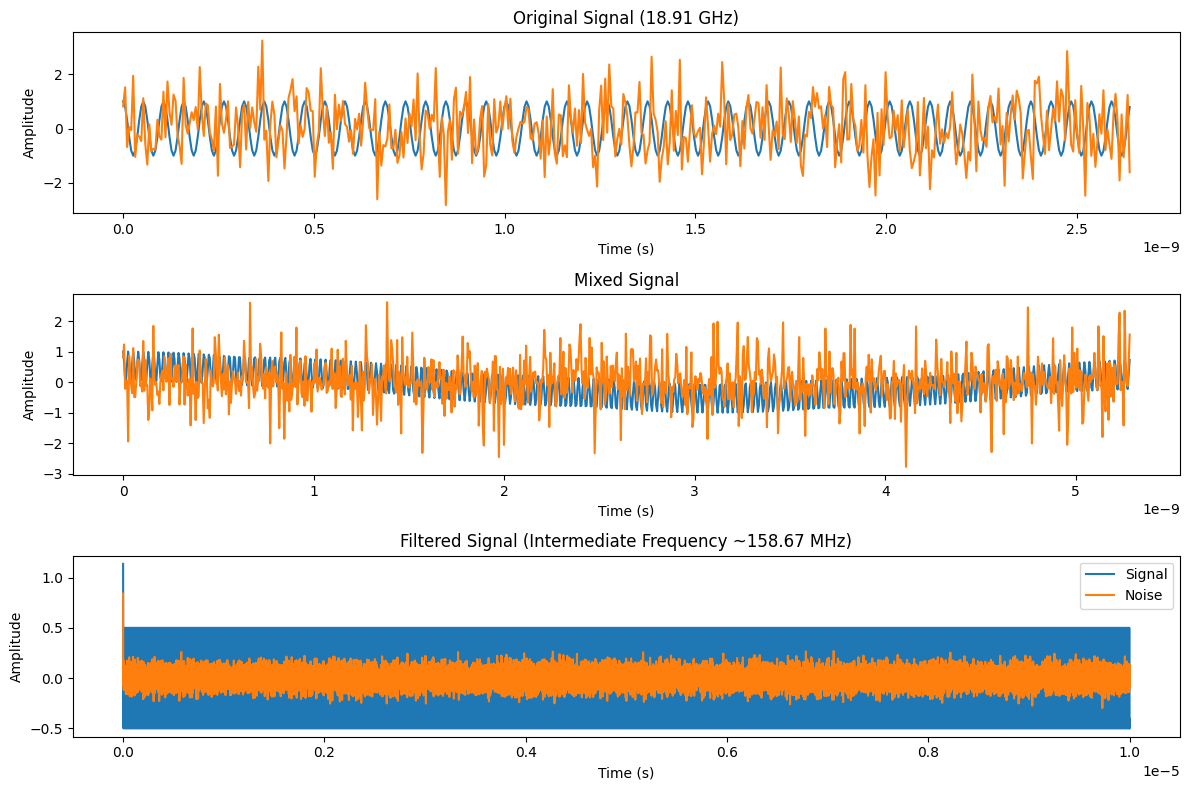

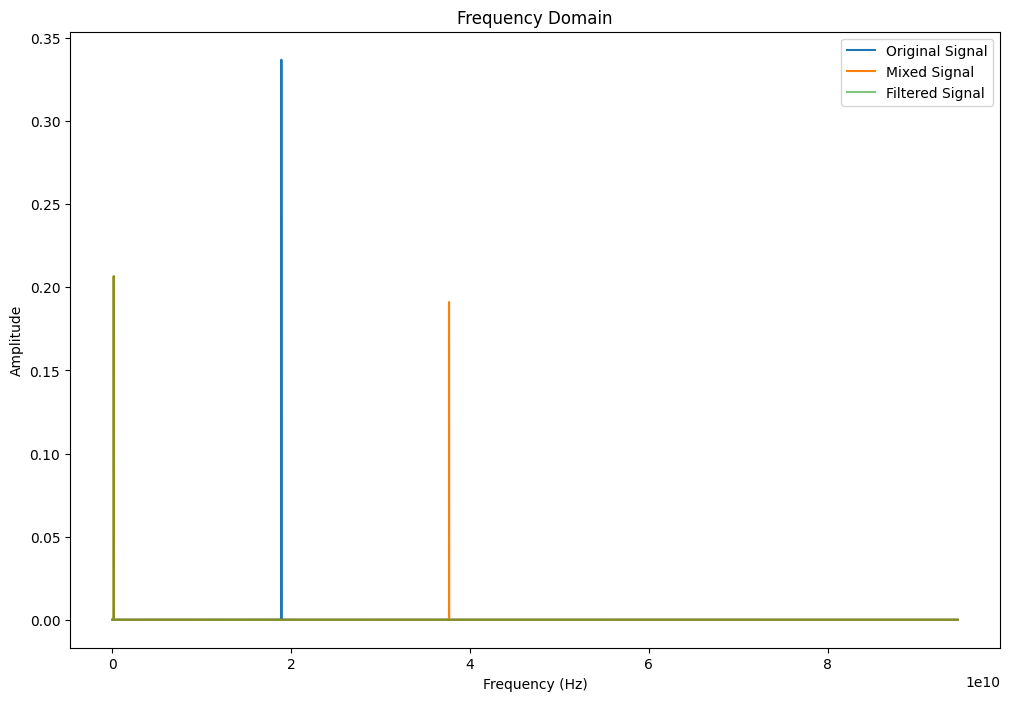

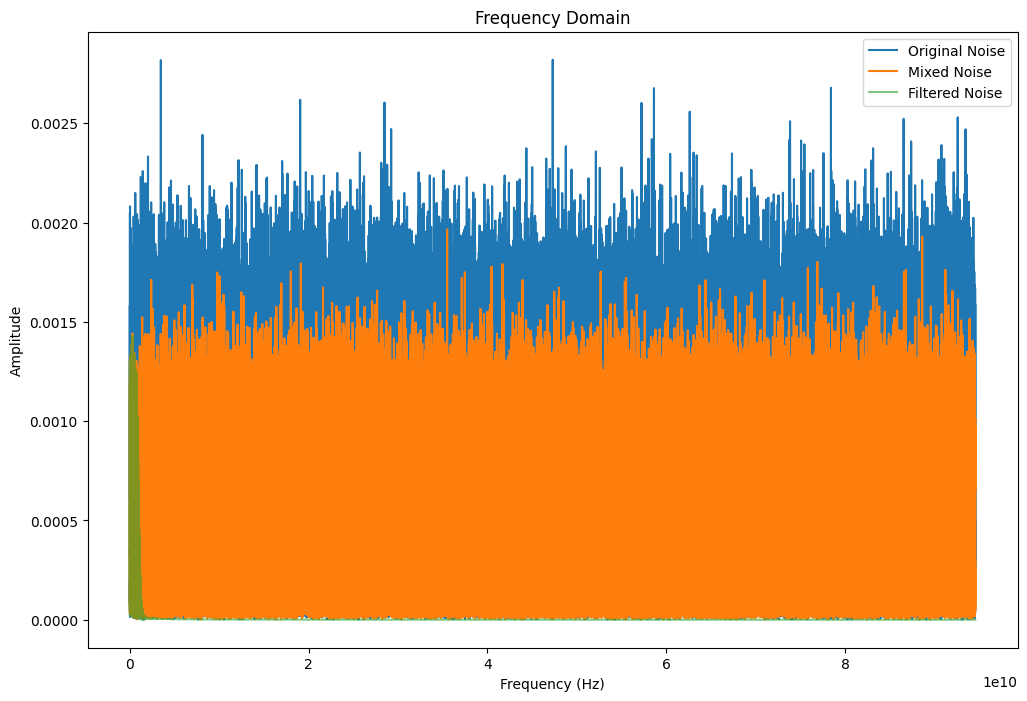

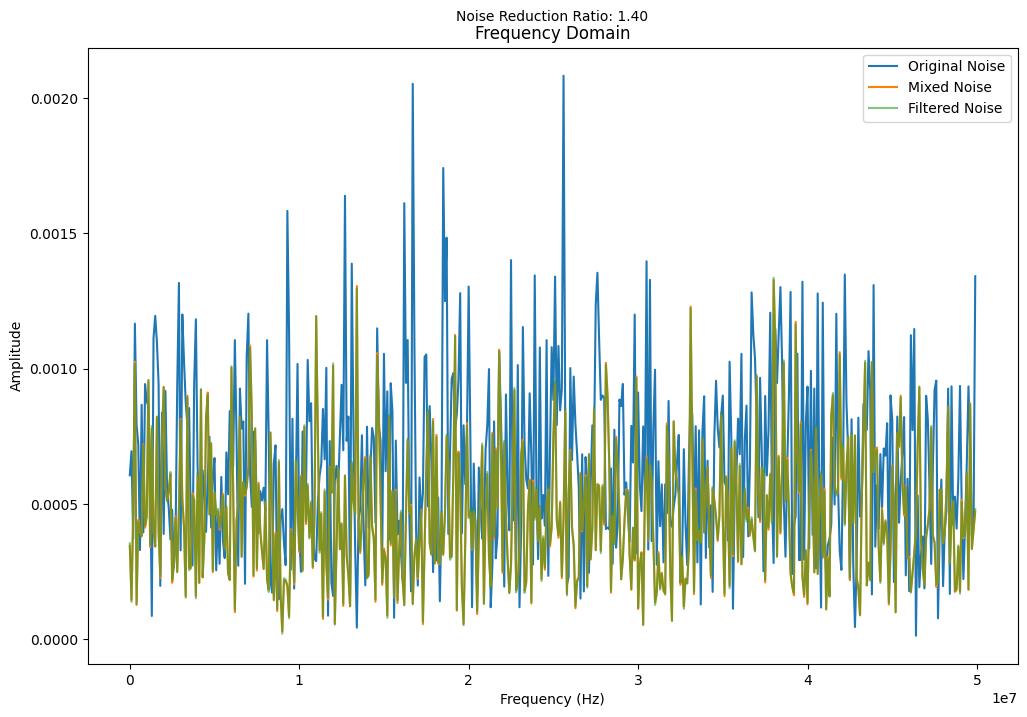

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

fs = 18.91e10
duration = 1e-5

t = np.arange(0, duration, 1/fs)

f_signal = 18907952975.819836 
f_lo = 18749286322.187534

f_if = f_signal - f_lo

print(f_if)

signal = np.cos(2 * np.pi * f_signal * t)
noise = np.random.normal(0, 1, len(t))
lo = np.cos(2 * np.pi * f_lo * t)


# Design a low-pass filter to isolate the IF component
# Use a cutoff slightly above the intermediate frequency
cutoff = 1e9  # 200 MHz cutoff frequency
nyquist = fs / 2
b, a = butter(5, cutoff / nyquist, btype='low')

mixed_signal = signal * lo
mixed_noise = noise * lo

# Filter the mixed signal
filtered_signal = filtfilt(b, a, mixed_signal)
filtered_noise = filtfilt(b, a, mixed_noise)

# Plot the signals
plt.figure(figsize=(12, 8))

# Original signal
plt.subplot(3, 1, 1)
plt.plot(t[:500], signal[:500])
plt.plot(t[:500], noise[:500])
plt.title('Original Signal (18.91 GHz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Mixed signal
plt.subplot(3, 1, 2)
plt.plot(t[:1000], mixed_signal[:1000])
plt.plot(t[:1000], mixed_noise[:1000])
plt.title('Mixed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Filtered signal (IF)
plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal, label='Signal')
plt.plot(t, filtered_noise, label='Noise')
plt.title('Filtered Signal (Intermediate Frequency ~158.67 MHz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.legend()
plt.tight_layout()
plt.show()

#################### Frequency Domain ####################

fft_original = np.fft.rfft(signal, norm='forward')
fft_mixed = np.fft.rfft(mixed_signal, norm='forward')
fft_filtered = np.fft.rfft(filtered_signal, norm='forward')

fft_noise = np.fft.rfft(noise, norm='forward')
fft_mixed_noise = np.fft.rfft(mixed_noise, norm='forward')
fft_filtered_noise = np.fft.rfft(filtered_noise, norm='forward')

freqs = np.fft.rfftfreq(len(t), 1/fs)

plt.figure(figsize=(12, 8))

plt.plot(freqs, np.abs(fft_original), label='Original Signal')
plt.plot(freqs, np.abs(fft_mixed), label='Mixed Signal')
plt.plot(freqs, np.abs(fft_filtered), label='Filtered Signal', alpha=0.6)
plt.legend()
# plt.xscale('log')
plt.title('Frequency Domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(freqs, np.abs(fft_noise), label='Original Noise')
plt.plot(freqs, np.abs(fft_mixed_noise), label='Mixed Noise')
plt.plot(freqs, np.abs(fft_filtered_noise), label='Filtered Noise', alpha=0.6)
plt.legend()
# plt.xscale('log')
plt.title('Frequency Domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(freqs[:500], np.abs(fft_noise[:500]), label='Original Noise')
plt.plot(freqs[:500], np.abs(fft_mixed_noise[:500]), label='Mixed Noise')
plt.plot(freqs[:500], np.abs(fft_filtered_noise[:500]), label='Filtered Noise', alpha=0.6)
plt.legend()
# plt.xscale('log')
plt.title('Frequency Domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

ratio = np.mean(np.abs(fft_noise[:500])) / (np.mean(np.abs(fft_filtered_noise[:500])))

# plot text at the top centre in the plot
plt.text(0.5, 1.05, f'Noise Reduction Ratio: {ratio:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.show()

In [19]:
import numpy as np

# Function to calculate signal power
def calculate_power(signal):
    return np.mean(signal**2)

# Calculate power of the original signal
original_signal_power = calculate_power(signal)

# Calculate power of the down-mixed, filtered signal
filtered_signal_power = calculate_power(filtered_signal)

# Calculate power of the original noise
original_noise_power = calculate_power(noise)

# Calculate power of the down-mixed, filtered noise
filtered_noise_power = calculate_power(filtered_noise)


# Display the results
print(f"Power of the original signal: {original_signal_power:.6e}")
print(f"Power of the down-mixed signal: {filtered_signal_power:.6e}")
print(f"Power of the original noise: {original_noise_power:.6e}")
print(f"Power of the down-mixed noise: {filtered_noise_power:.6e}")


# Compare the two powers
power_ratio = original_signal_power / filtered_signal_power
noise_power_ratio = original_noise_power / filtered_noise_power
print(f"Ratio of down-mixed signal power to original signal power: {power_ratio:.6e}")
print(f"Ratio of down-mixed noise power to original noise power: {noise_power_ratio:.6e}")

Power of the original signal: 5.000001e-01
Power of the down-mixed signal: 1.250172e-01
Power of the original noise: 9.999284e-01
Power of the down-mixed noise: 4.810800e-03
Ratio of down-mixed signal power to original signal power: 3.999451e+00
Ratio of down-mixed noise power to original noise power: 2.078508e+02


The results of this short exercise are as follows:

- The power loss associated with downmixing differs for both noise and signal data.
- The power loss associated with downmixing is higher for signal data (factor of 4) than for noise data (factor of 2).